# Create atmospheric forcing for regional MITgcm based on JRA55do RYF

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import xmitgcm as xm

In [2]:
fn0='_input4MIPs_atmosphericState_OMIP_MRI-JRA55-do-1-5-0_gr_' # common part of file name
var0=['friver','licalvf']  # List of variables (friver, licalvf) for processing
var1=['huss','psl','tas','uas','vas']  # List of atmospheric variables for processing
var2=['prra','prsn','rlds','rsds']  # List of additional variables for processing
sdir='./' # Set the location of the JRA55do source files
fn1q='199*'

In [3]:
# define new grid
runcase = 'NorthPacific.lonlat2x2.42lev'
rname = 'NorthPacific'
xrange = [131, 249]  # zonal extent
yrange = [-16, 62]  # meridional extent
n = [60, 40]   # number of grid points

In [4]:
#define a new grid coordinates
xn = np.linspace(xrange[0], xrange[1], n[0])
yn = np.linspace(yrange[0], yrange[1], n[1])
zn=np.array([-5.0000e+00, -1.5500e+01, -2.7000e+01, -3.9500e+01, -5.3000e+01,
       -6.8000e+01, -8.5000e+01, -1.0400e+02, -1.2550e+02, -1.5000e+02,
       -1.7750e+02, -2.0850e+02, -2.4350e+02, -2.8300e+02, -3.2800e+02,
       -3.7950e+02, -4.3850e+02, -5.0600e+02, -5.8300e+02, -6.7100e+02,
       -7.7200e+02, -8.8800e+02, -1.0210e+03, -1.1735e+03, -1.3485e+03,
       -1.5495e+03, -1.7805e+03, -2.0460e+03, -2.3190e+03, -2.5750e+03,
       -2.8250e+03, -3.0750e+03, -3.3250e+03, -3.5750e+03, -3.8250e+03,
       -4.0750e+03, -4.3250e+03, -4.5750e+03, -4.8250e+03, -5.0750e+03,
       -5.3250e+03, -5.5750e+03], dtype=float) * -1
#
# print the values of x0 and y0
x0 = xn[0]-(xn[1]-xn[0])/2.
y0 = yn[0]-(yn[1]-yn[0])/2.
print('x0='+str(x0))
print('y0='+str(y0))
#
# print the number of grid points in x, y and z
print('Nx='+str(xn.size))
print('Ny='+str(yn.size))
print('Nz='+str(zn.size))

x0=130.0
y0=-17.0
Nx=60
Ny=40
Nz=42


In [6]:
for n in range(2):
    # Iterating over the range of 2 (0 to 1)
    
    ds = xr.open_mfdataset(var0[n] + fn0 + fn1q)
    # Opening a multi-file dataset using the provided file name pattern and variable name from var0[n]
    
    ds1 = ds.sel(time=slice('1990-05-01', '1991-04-30')).interp(lat=yn, lon=xn)
    # Selecting a specific time range ('1990-05-01' to '1991-04-30') from the opened dataset and interpolating it to the new latitude and longitude arrays
    
    ds1.to_netcdf(var0[n] + '-' + rname + '-JRA55do-RYF-daily0000.nc')
    # Saving the interpolated dataset to a NetCDF file with a specific naming convention
    
    data = ds1[var0[n]].to_numpy()*0.97561e-3
    # Extracting the variable data from the interpolated dataset and converting it to a NumPy array
    
    xm.utils.write_to_binary(data.flatten(), var0[n] + '-' + rname + '-JRA55do-RYF-daily0000.bin')
    # Flattening the data array, and writing it to a binary file using the provided naming convention

/Users/takamitsu3/opt/anaconda3/envs/calc0/lib/python3.9/site-packages/xarray/conventions.py:445: UserWarning: Variable 'time' has datetime type and a bounds variable but time.encoding does not have units specified. The units encodings for 'time' and 'time_bnds' will be determined independently and may not be equal, counter to CF-conventions. If this is a concern, specify a units encoding for 'time' before writing to a file.
  warnings.warn(
/Users/takamitsu3/opt/anaconda3/envs/calc0/lib/python3.9/site-packages/xarray/conventions.py:445: UserWarning: Variable 'time' has datetime type and a bounds variable but time.encoding does not have units specified. The units encodings for 'time' and 'time_bnds' will be determined independently and may not be equal, counter to CF-conventions. If this is a concern, specify a units encoding for 'time' before writing to a file.
  warnings.warn(


In [7]:
for n in range(5):
    # Iterating over the range of 5 (0 to 4)
    
    ds = xr.open_mfdataset(var1[n] + fn0 + fn1q)
    # Opening a multi-file dataset using the provided file name pattern and variable name from var1[n]
    
    ds1 = ds.sel(time=slice('1990-05-01', '1991-04-30')).interp(lat=yn, lon=xn)
    # Selecting a specific time range ('1990-05-01' to '1991-04-30') from the opened dataset and interpolating it to the new latitude and longitude arrays
    
    ds1.to_netcdf(var1[n] + '-' + rname + '-JRA55do-RYF-3hr0000.nc')
    # Saving the interpolated dataset to a NetCDF file with a specific naming convention
    
    data = ds1[var1[n]].to_numpy()
    # Extracting the variable data from the interpolated dataset and converting it to a NumPy array
    
    xm.utils.write_to_binary(data.flatten(), var1[n] + '-' + rname + '-JRA55do-RYF-3hr0000.bin')
    # Flattening the data array and writing it to a binary file using the provided naming convention


/Users/takamitsu3/opt/anaconda3/envs/calc0/lib/python3.9/site-packages/xarray/conventions.py:445: UserWarning: Variable 'time' has datetime type and a bounds variable but time.encoding does not have units specified. The units encodings for 'time' and 'time_bnds' will be determined independently and may not be equal, counter to CF-conventions. If this is a concern, specify a units encoding for 'time' before writing to a file.
  warnings.warn(
/Users/takamitsu3/opt/anaconda3/envs/calc0/lib/python3.9/site-packages/xarray/conventions.py:445: UserWarning: Variable 'time' has datetime type and a bounds variable but time.encoding does not have units specified. The units encodings for 'time' and 'time_bnds' will be determined independently and may not be equal, counter to CF-conventions. If this is a concern, specify a units encoding for 'time' before writing to a file.
  warnings.warn(
/Users/takamitsu3/opt/anaconda3/envs/calc0/lib/python3.9/site-packages/xarray/conventions.py:445: UserWarnin

In [8]:
for n in range(4):
    # Iterating over the range of 4 (0 to 3)
    
    ds = xr.open_mfdataset(var2[n] + fn0 + fn1q)
    # Opening a multi-file dataset using the provided file name pattern and variable name from var2[n]
    
    ds1 = ds.sel(time=slice('1990-05-01', '1991-04-30')).interp(lat=yn, lon=xn)
    # Selecting a specific time range ('1990-05-01' to '1991-04-30') from the opened dataset and interpolating it to the new latitude and longitude arrays
    
    ds1.to_netcdf(var2[n] + '-' + rname + '-JRA55do-RYF-3hr0130.nc')
    # Saving the interpolated dataset to a NetCDF file with a specific naming convention
    if n <= 1:
        data = ds1[var2[n]].to_numpy()*0.97561e-3
    else:
        data = ds1[var2[n]].to_numpy()
    # Extracting the variable data from the interpolated dataset and converting it to a NumPy array
    
    xm.utils.write_to_binary(data.flatten(), var2[n] + '-' + rname + '-JRA55do-RYF-3hr0130.bin')
    # Flattening the data array and writing it to a binary file using the provided naming convention


/Users/takamitsu3/opt/anaconda3/envs/calc0/lib/python3.9/site-packages/xarray/conventions.py:445: UserWarning: Variable 'time' has datetime type and a bounds variable but time.encoding does not have units specified. The units encodings for 'time' and 'time_bnds' will be determined independently and may not be equal, counter to CF-conventions. If this is a concern, specify a units encoding for 'time' before writing to a file.
  warnings.warn(
/Users/takamitsu3/opt/anaconda3/envs/calc0/lib/python3.9/site-packages/xarray/conventions.py:445: UserWarning: Variable 'time' has datetime type and a bounds variable but time.encoding does not have units specified. The units encodings for 'time' and 'time_bnds' will be determined independently and may not be equal, counter to CF-conventions. If this is a concern, specify a units encoding for 'time' before writing to a file.
  warnings.warn(
/Users/takamitsu3/opt/anaconda3/envs/calc0/lib/python3.9/site-packages/xarray/conventions.py:445: UserWarnin

In [9]:
# visualize the results

In [11]:
X = ds1.lon.to_numpy()
# Extracting the longitude values from the 'ds1' dataset and converting them to a NumPy array
Y = ds1.lat.to_numpy()
# Extracting the latitude values from the 'ds1' dataset and converting them to a NumPy array
Nx = X.size
# Calculating the size of the longitude array
Ny = Y.size
# Calculating the size of the latitude array
data = np.zeros((11, Ny, Nx), dtype=float)
# Creating a multi-dimensional NumPy array of shape (11, Ny, Nx) filled with zeros, to store the data
allvars=np.empty(11,dtype='U16')

for n in range(2):
    # Iterating over the range of 2 (0 to 1)
    
    ds1 = xr.open_dataset(var0[n] + '-' + rname + '-JRA55do-RYF-daily0000.nc')
    # Opening the NetCDF dataset for the specific variable and assigning it to 'ds1'
    
    data[n, :, :] = ds1[var0[n]].mean('time').to_numpy()
    # Taking the mean along the 'time' dimension of the variable in 'ds1', converting it to a NumPy array, and assigning it to the corresponding position in the 'data' array
    allvars[n]=var0[n]
    
for n in range(5):
    # Iterating over the range of 5 (0 to 4)
    
    ds1 = xr.open_dataset(var1[n] + '-' + rname + '-JRA55do-RYF-3hr0000.nc')
    # Opening the NetCDF dataset for the specific variable and assigning it to 'ds1'
    
    data[n + 2, :, :] = ds1[var1[n]].mean('time').to_numpy()
    # Taking the mean along the 'time' dimension of the variable in 'ds1', converting it to a NumPy array, and assigning it to the corresponding position in the 'data' array
    allvars[n+2]=var1[n]
for n in range(4):
    # Iterating over the range of 4 (0 to 3)
    
    ds1 = xr.open_dataset(var2[n] + '-' + rname + '-JRA55do-RYF-3hr0130.nc')
    # Opening the NetCDF dataset for the specific variable and assigning it to 'ds1'
    
    data[n + 7, :, :] = ds1[var2[n]].mean('time').to_numpy()
    # Taking the mean along the 'time' dimension of the variable in 'ds1', converting it to a NumPy array, and assigning it to the corresponding position in the 'data' array
    allvars[n+7]=var2[n]

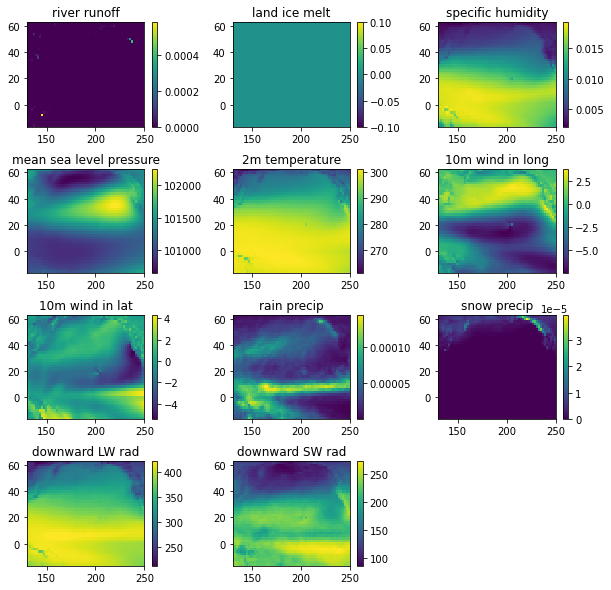

In [12]:
fig=plt.figure(figsize=(10,10))
ax=fig.subplots(4,3)
plt.subplots_adjust(hspace=0.4,wspace=0.4)
vname=['river runoff','land ice melt','specific humidity',
       'mean sea level pressure','2m temperature','10m wind in long','10m wind in lat',
       'rain precip','snow precip','downward LW rad','downward SW rad']
for n in range(11):
    nrow=int(np.floor(n/3))
    ncol=n%3
    pltdata=data[n,:,:]
    cmin=np.percentile(pltdata.flatten(),10)
    cmax=np.percentile(pltdata.flatten(),90)
    #ax[nx,ny].pcolormesh(X,Y,pltdata,vmin=cmin,vmax=cmax)
    im=ax[nrow,ncol].pcolormesh(X,Y,pltdata)
    ax[nrow,ncol].set_title(vname[n])
    plt.colorbar(im,ax=ax[nrow,ncol])
#
fig.delaxes(ax[3,2])